In [1]:
import numpy as np
import os
# from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
# from tensorflow.keras.models import Sequential
# from tensorflow import keras
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
# from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt         
import cv2                                 
# import tensorflow as tf                
from tqdm import tqdm

In [7]:
# Connect to Google Drive Account to retrieve image dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (250, 250)

In [5]:
# Function to load and preprocess images to have the same size and resolution
def load_data():
    training_dataset = "/content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/training_set"
    testing_dataset = "/content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/testing_set"
    datasets = [training_dataset, testing_dataset]
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):
            if folder != "desktop.ini":

                label = class_names_label[folder]

                for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    if file != "desktop.ini":
                        img_path = os.path.join(os.path.join(dataset, folder), file)
                        
                        try:
                            
                            image = cv2.imread(img_path)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            image = cv2.resize(image, IMAGE_SIZE) 

                            images.append(image)
                            labels.append(label)
                        except Exception as e:
                            print(f"Broken: {img_path}")
                        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [8]:
# Splitting Training datasets for both images and labels
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/training_set


 70%|███████   | 561/800 [00:22<00:07, 32.11it/s]

Broken: /content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/training_set/Oblong/oblong (724).jpg


100%|██████████| 800/800 [00:32<00:00, 24.78it/s]


Loading /content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/testing_set


100%|██████████| 200/200 [00:05<00:00, 33.58it/s]


In [9]:
# Assigning training and testing dataset randomly
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [10]:
# Displaying number of images in both training and testing datasets (following 80% 20% standard for training and testing datasets, respectively)
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0
test_images = test_images / 255.0

Number of training examples: 3999
Number of testing examples: 1000
Each image is of size: (250, 250)


In [11]:
%%time

# Import Decision Trees Classifier library
from sklearn.tree import DecisionTreeClassifier

lenofimage = len(train_images)
X = np.array(train_images).reshape(lenofimage,-1)

# Decision Tree model build
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Decision Tree model training
DTC_model = DTC.fit(X, train_labels)

CPU times: user 28min 26s, sys: 2.69 s, total: 28min 29s
Wall time: 28min 30s


In [12]:
# Decision Tree model prediction
X_test = np.array(test_images).reshape(len(test_images),-1)
pred_labels_DTC = DTC.predict(X_test)

In [13]:
# Printing accuracy for Decision Tree Classifier
from sklearn.metrics import accuracy_score
print("Accuracy on DTC data is",accuracy_score(test_labels,pred_labels_DTC))

Accuracy on DTC data is 0.246


DTC
actual label: Square
Predicted label: Square


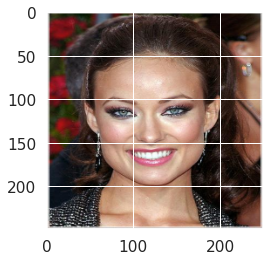

In [14]:
# Testing the model
images = test_images
id = 960 # DTC: 960, 620

images = test_images
plt.imshow(images[id])
print("DTC")
print('actual label:',class_names[test_labels[id]])
print('Predicted label:',class_names[pred_labels_DTC[id]])